# Project 2: ML Modeling

For this project, classification models will be applied to predict the rating for Airbnb listings in the New York City area.

The original file containing the dataset can be found at this URL: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

## Part 1: Exploratory Data Analysis

<b>Questions to answer:</b>
1. Does the location of an Airbnb have an impact on the rating?
2. Does the number of reviews have any impact on the rating?
3. What impact does host verification, instant booking, and cancellation policy have on the rating?

### Importing the modules

In [1]:
# importing the libraries to be used for EDA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
from pathlib import Path

### Importing the dataset

In [2]:
# importing the dataset
df = pd.read_csv('C:/Users/19145/Documents/CS675_Jupyter_Notebooks/project_files/Airbnb_Open_Data.csv', index_col=0) # -- This will allow the selection of data by labels.
df.shape

C:\Users\19145\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(102599, 25)

The dataset will be sampled so that it will be easier to work with in jupyter.

In [3]:
# sample the dataset
# NOTE: This code is only executed once so that the same sample is used.
#
'''
df = df.sample(n=10000)

# Save the sampled dataset. This is only performed once.
filepath = Path('C:/Users/19145/Documents/CS675_Jupyter_Notebooks/project_files/airbnb_open_data_sampled.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath, index=True)
'''

"\ndf = df.sample(n=10000)\n\n# Save the sampled dataset. This is only performed once.\nfilepath = Path('C:/Users/19145/Documents/CS675_Jupyter_Notebooks/project_files/airbnb_open_data_sampled.csv')  \nfilepath.parent.mkdir(parents=True, exist_ok=True)  \ndf.to_csv(filepath, index=True)\n"

In [4]:
# Import the sampled dataset
df = pd.read_csv('C:/Users/19145/Documents/CS675_Jupyter_Notebooks/project_files/airbnb_open_data_sampled.csv')

# Display the first 10 rows of the dataset
df.head(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,17460981,House on a quiet dead-end street in hip Ridgewood,63396104072,verified,Kelli,Queens,Glendale,40.69507,-73.89599,United States,...,46.0,5.0,1.0,6/30/2018,0.08,4.0,1.0,0.0,No pets or smoking allowed any where on the pr...,NaN
1,37211229,Entire 1 Bedroom apt,71565439330,verified,Kevin,Queens,Jamaica,40.67684,-73.77502,United States,...,199.0,1.0,1.0,5/16/2021,0.09,5.0,1.0,0.0,NaN,NaN
2,16252548,It's All Yours: Big Beautiful 1 Bedroom in Harlem,50796166627,unconfirmed,Jahmil,Manhattan,Harlem,40.81425,-73.94187,United States,...,225.0,3.0,5.0,5/28/2018,0.31,3.0,1.0,0.0,A few totally painless house rules: - Please ...,NaN
3,23705284,Cozy Brooklyn Private Bedroom,28905384755,unconfirmed,Rachael Lee,Brooklyn,Bedford-Stuyvesant,40.67933,-73.94103,United States,...,194.0,3.0,1.0,2/16/2019,0.21,2.0,1.0,0.0,No smoking! Please let me know as soon as you ...,NaN
4,49338632,2 Floor Condo in Williamsburg with Pvt Terrace,28447123313,verified,Thobey,Brooklyn,Williamsburg,40.71684,-73.94578,United States,...,131.0,1.0,0.0,NaN,NaN,3.0,1.0,0.0,NaN,NaN
5,43771448,Bright big bedroom in Brooklyn,77280159569,unconfirmed,Marie,Brooklyn,Kensington,40.63501,-73.97298,United States,...,179.0,1.0,1.0,12/10/2016,0.03,5.0,1.0,0.0,Not too loud. No 'house rules' necessary as lo...,NaN
6,19873979,Private Room,51588895565,verified,Yvonne,Brooklyn,Borough Park,40.63528,-74.00734,United States,...,184.0,1.0,4.0,6/1/2019,0.84,4.0,7.0,152.0,"Please strip the beds when you leave, lock the...",NaN
7,29578995,City Saver in Brooklyn,2125505600,unconfirmed,James,Brooklyn,Sunset Park,40.64876,-74.00597,United States,...,105.0,1.0,47.0,2/25/2022,1.88,2.0,1.0,0.0,NaN,NaN
8,49615334,"Cozy, cool, spacious Midtown!",19585442982,verified,Daniel,Manhattan,Murray Hill,40.74796,-73.97949,United States,...,214.0,1.0,3.0,8/25/2016,0.08,3.0,1.0,0.0,"We live on the 3rd floor of a 3-family house, ...",NaN
9,19295721,Heaven away from Home!.,92208593104,unconfirmed,Majidudeen,Queens,Jamaica,40.70647,-73.79794,United States,...,46.0,30.0,0.0,NaN,NaN,3.0,1.0,365.0,"Starting mid-November, I am looking for a long...",NaN


### Data Dictionary

The sample above provides a view of the data in this dataset, including its features (columns):

<b>id</b> - Airbnb's unique identifier for the listing.

<b>NAME</b> - Name of the listing.

<b>host id</b> - Airbnb's unique identifier for the host/user.

<b>host_identity_verified</b> - t=true; f=false

<b>host name</b> - Name of the house. Usually just the first name(s).

<b>neighbourhood group</b> - The name of the bourough.

<b>neighbourhood</b> - The section of the bourough.

<b>lat</b> - latitude of the airbnb's location.

<b>long</b> - longitude of the airbnb's location.

<b>country</b> - Name of the country.

<b>instant_bookable</b> - (t=true; f=false). Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing.

<b>cancellation_policy</b> - Host's policy on cancellations.

<b>room type</b> - All homes are grouped into the following three room types:

<b><i>Entire place</i></b>
Entire places are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: ""Host occupies first floor of the home""), and provide further details on the listing.

<b><i>Private rooms</i></b>
Private rooms are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your own private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room.

<b><i>Shared rooms</i></b>
Shared rooms are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays."

<b>Construction year</b> - The year the building was built.

<b>price</b> - Daily price in local currency.

<b>service fee</b> - Fee for services provided by the host.

<b>minimum nights</b> - minimum number of night stays for the listing.

<b>number of reviews</b> - The number of reviews for the listing.

<b>last review</b> - The date of the most recent review.

<b>reviews per month</b> - The number of reviews the listing has over the lifetime of its listing.

<b>review rate number</b> - The rating for the listing (target variable).

<b>calculated host listings count</b> - The number of listings the host has in the city/region.

<b>availability 365</b> - The availability of the listing x days in the future as determined by the calendar. NOTE: a listing may not be available because it has been booked by a guest or blocked by the host.

<b>house_rules</b> - The host's rules for the guests.

<b>license</b> - The license/permit/registration number.




### Inspecting data types

In [5]:
# Return the data types of each feature.
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                             float64
service fee                       float64
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

### Selecting features

Some of the features in this dataset seem unnecessary for what is to be accomplished. For example, we do not need to know the latitude and longitude of our listings since they are all located in the same geographic area (New York City). A new dataframe will be created that will exclude these features.

In [6]:
# Create a list for the necessary features
features = ['host_identity_verified', 'calculated host listings count', 'license', 
            'neighbourhood group', 'instant_bookable', 'cancellation_policy', 'availability 365', 
            'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 
            'reviews per month', 'review rate number']

# Create a new dataframe with the necessary features
df_subset_01 = df[features]

Some of the column names in this dataset could be improved to provide some better clarity. For example, the column 'neighbourhood group' contains the borough that the listing is located in. It would be much easier if this column was renamed 'borough' instead.

Also, the whitespaces in these column names should be replaced with underscores.

### Cleaning of the data

In [7]:
# Rename some of the columns of the dataset.
df_subset_01.rename(columns={'host_identity_verified': 'id_verified',
                      'calculated host listings count': 'num_host_listings', 'neighbourhood group': 'borough',
                        'availability 365': 'avail365', 'room type': 'room_type',
                      'Construction year': 'yr_built', 'service fee': 'service_fee', 'minimum nights': 'min_nights',
                      'number of reviews': 'num_reviews', 'reviews per month': 'monthly_reviews',
                      'review rate number': 'rating'}, inplace=True)

df_subset_01.head(10)

C:\Users\19145\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id_verified,num_host_listings,license,borough,instant_bookable,cancellation_policy,avail365,room_type,yr_built,price,service_fee,min_nights,num_reviews,monthly_reviews,rating
0,verified,1.0,NaN,Queens,False,flexible,0.0,Entire home/apt,2012.0,232.0,46.0,5.0,1.0,0.08,4.0
1,verified,1.0,NaN,Queens,False,flexible,0.0,Entire home/apt,2022.0,996.0,199.0,1.0,1.0,0.09,5.0
2,unconfirmed,1.0,NaN,Manhattan,True,flexible,0.0,Entire home/apt,2019.0,1127.0,225.0,3.0,5.0,0.31,3.0
3,unconfirmed,1.0,NaN,Brooklyn,False,strict,0.0,Private room,2018.0,971.0,194.0,3.0,1.0,0.21,2.0
4,verified,1.0,NaN,Brooklyn,True,moderate,0.0,Entire home/apt,2004.0,653.0,131.0,1.0,0.0,NaN,3.0
5,unconfirmed,1.0,NaN,Brooklyn,False,strict,0.0,Private room,2012.0,894.0,179.0,1.0,1.0,0.03,5.0
6,verified,7.0,NaN,Brooklyn,False,strict,152.0,Private room,2010.0,922.0,184.0,1.0,4.0,0.84,4.0
7,unconfirmed,1.0,NaN,Brooklyn,False,moderate,0.0,Entire home/apt,2007.0,523.0,105.0,1.0,47.0,1.88,2.0
8,verified,1.0,NaN,Manhattan,False,moderate,0.0,Shared room,2013.0,1069.0,214.0,1.0,3.0,0.08,3.0
9,unconfirmed,1.0,NaN,Queens,False,strict,365.0,Entire home/apt,2015.0,231.0,46.0,30.0,0.0,NaN,3.0


#### Counting the number of unique values

In [8]:
# Count the number of unique values
unique = df_subset_01.nunique()
print("Here are the unique values in each column:")
print(unique)

Here are the unique values in each column:
id_verified               2
num_host_listings        75
license                   1
borough                   5
instant_bookable          2
cancellation_policy       3
avail365                437
room_type                 4
yr_built                 20
price                  1151
service_fee             231
min_nights               70
num_reviews             307
monthly_reviews         693
rating                    5
dtype: int64


#### Checking for missing values

The following is a summary of the missing values in our dataset:
license                9999
monthly_reviews        1503
avail365                 46
min_nights               46
rating                   40
service_fee              33
num_host_listings        31
price                    29
yr_built                 28
id_verified              23
num_reviews              19
instant_bookable         16
cancellation_policy      10
borough                   3
room_type                 0
dtype: int64


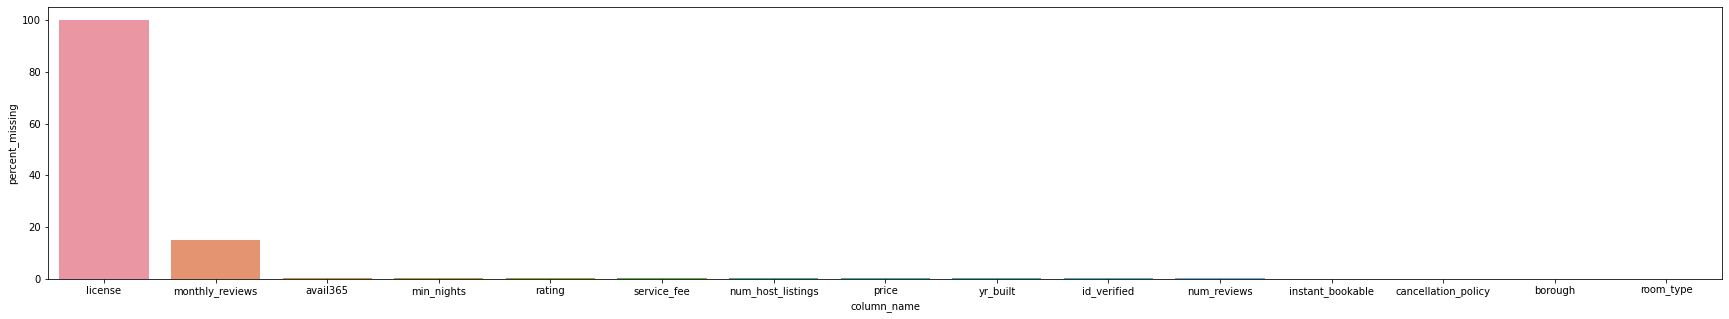

In [9]:
# Count for missing values
print("The following is a summary of the missing values in our dataset:")
print(df_subset_01.isna().sum().sort_values(ascending=False))

# Calculate the percentage of missing values for each column
perc_missing = df_subset_01.isnull().sum() * 100 / len(df_subset_01)
df_missing_values = pd.DataFrame({'column_name': df_subset_01.columns,
                                 'percent_missing': perc_missing})
df_missing_values.sort_values('percent_missing', inplace=True, ascending=False)

# Construct a plot to display the percentages of missing values
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(
    x='column_name',
    y='percent_missing',
    data=df_missing_values,
    ax=ax
)
plt.xlabel('column_name')
plt.ylabel('percent_missing')
plt.show()

The license column has nearly 100 percent of its values missing. Therefore, this column will be removed from the dataset. We also remove rows where borough, instant bookable, and cancellation information is missing since the count for those is relatively small.

In [10]:
# Remove the license column
df_subset_02 = df_subset_01.drop(['license'],axis=1)

# Remove specified rows
index_missing_val = df_subset_02[(df_subset_02['borough'].isna() == True) | 
                                 (df_subset_02['instant_bookable'].isna() == True) |
                                 (df_subset_02['cancellation_policy'].isna() == True)].index
df_subset_02.drop(index_missing_val, inplace=True)
df_subset_02.isna().sum()

id_verified              21
num_host_listings        31
borough                   0
instant_bookable          0
cancellation_policy       0
avail365                 44
room_type                 0
yr_built                 26
price                    28
service_fee              33
min_nights               44
num_reviews              19
monthly_reviews        1503
rating                   38
dtype: int64

#### Checking for and removing duplicates

In [11]:
# Check for duplicates
df_subset_02[df_subset_02.duplicated()]

,id_verified,num_host_listings,borough,instant_bookable,cancellation_policy,avail365,room_type,yr_built,price,service_fee,min_nights,num_reviews,monthly_reviews,rating
1362,unconfirmed,2.0,Manhattan,True,strict,168.0,Private room,2011.0,1022.0,204.0,3.0,12.0,0.32,4.0
1579,verified,1.0,Brooklyn,False,moderate,31.0,Entire home/apt,2019.0,292.0,58.0,30.0,62.0,1.14,4.0
2867,unconfirmed,12.0,Manhattan,False,strict,365.0,Private room,2021.0,609.0,122.0,3.0,1.0,0.05,2.0
3564,unconfirmed,1.0,Queens,False,flexible,362.0,Private room,2007.0,1172.0,234.0,3.0,1.0,0.04,2.0
3906,verified,2.0,Manhattan,False,flexible,110.0,Private room,2005.0,99.0,20.0,30.0,51.0,0.77,3.0
4060,verified,10.0,Manhattan,True,strict,350.0,Entire home/apt,2007.0,993.0,199.0,30.0,3.0,0.12,1.0
4921,unconfirmed,1.0,Brooklyn,True,strict,13.0,Private room,2015.0,1113.0,223.0,1.0,12.0,3.13,3.0
5347,unconfirmed,12.0,Manhattan,False,strict,365.0,Private room,2021.0,609.0,122.0,3.0,1.0,0.05,2.0
5622,verified,8.0,Brooklyn,False,flexible,144.0,Entire home/apt,2006.0,1191.0,238.0,30.0,11.0,0.34,2.0
5669,unconfirmed,1.0,Manhattan,True,strict,103.0,Entire home/apt,2004.0,585.0,117.0,4.0,16.0,0.51,5.0


In [12]:
# Drop duplicate listings
df_subset_02.drop_duplicates(subset=None, keep='first', inplace=True)

# Confirm duplicates have been removed
df_subset_02[df_subset_02.duplicated()]

,id_verified,num_host_listings,borough,instant_bookable,cancellation_policy,avail365,room_type,yr_built,price,service_fee,min_nights,num_reviews,monthly_reviews,rating


#### Replacing missing values

The missing values for the remaining features will be replaced with default values.

In [13]:
# Calculating the default values
all_min_nights = np.array(df_subset_02['min_nights'].dropna())
d_nights = round(np.mean(all_min_nights))

all_ratings = np.array(df_subset_02['rating'].dropna())
d_rating = round(np.mean(all_ratings))

all_prices = np.array(df_subset_02['price'].dropna())
d_price = round(np.mean(all_prices))

all_fees = np.array(df_subset_02['service_fee'].dropna())
d_fee = round(np.mean(all_fees))

In [14]:
# Assign default values for missing values
df_subset_02['monthly_reviews'].fillna(0, inplace=True)
df_subset_02['avail365'].fillna(0, inplace=True)
df_subset_02['min_nights'].fillna(d_nights, inplace=True)
df_subset_02['rating'].fillna(d_rating, inplace=True)
df_subset_02['num_host_listings'].fillna(0, inplace=True)
df_subset_02['yr_built'].fillna(0, inplace=True)
df_subset_02['id_verified'].fillna('missing', inplace=True)
df_subset_02['num_reviews'].fillna(0, inplace=True)
df_subset_02['price'].fillna(d_price, inplace=True)
df_subset_02['service_fee'].fillna(d_fee, inplace=True)

df_subset_02.isna().sum()

id_verified            0
num_host_listings      0
borough                0
instant_bookable       0
cancellation_policy    0
avail365               0
room_type              0
yr_built               0
price                  0
service_fee            0
min_nights             0
num_reviews            0
monthly_reviews        0
rating                 0
dtype: int64

#### Changing Data Types

When observing the data for many of the numeric columns, they appear to be of the float data type when they should be int. This requires a data type conversion to be performed.

In [15]:
# Create a dictionary for the conversion of data types
convert_dict = {
    'num_host_listings': int,
    'avail365': int,
    'min_nights': int,
    'num_reviews': int,
    'monthly_reviews': float,
    'rating': int,
    'yr_built': int,
    'price': int,
    'service_fee': int
}

# Create a new dateframe containing the converted columns
df_subset_03 = df_subset_02.astype(convert_dict)

# Confirm the new data types
df_subset_03.dtypes

id_verified             object
num_host_listings        int32
borough                 object
instant_bookable        object
cancellation_policy     object
avail365                 int32
room_type               object
yr_built                 int32
price                    int32
service_fee              int32
min_nights               int32
num_reviews              int32
monthly_reviews        float64
rating                   int32
dtype: object

### View Descriptive Statistics

In [16]:
df_subset_03.describe()

,num_host_listings,avail365,yr_built,price,service_fee,min_nights,num_reviews,monthly_reviews,rating
count,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000
mean,7.754502,140.815776,2007.235235,623.021833,124.595633,7.859342,27.880672,1.179370,3.278096
std,32.264418,134.788358,102.962455,329.787203,65.916611,20.245533,50.104251,1.705444,1.288498
min,0.000000,-10.000000,0.000000,50.000000,10.000000,-12.000000,0.000000,0.000000,1.000000
25%,1.000000,3.000000,2007.500000,341.000000,68.000000,1.000000,1.000000,0.090000,2.000000
50%,1.000000,97.000000,2012.000000,621.000000,124.000000,3.000000,7.000000,0.500000,3.000000
75%,2.000000,267.000000,2017.000000,907.000000,181.000000,5.000000,31.000000,1.730000,4.000000
max,332.000000,426.000000,2022.000000,1200.000000,240.000000,999.000000,618.000000,65.740000,5.000000


The descriptive statistics table shows that there are negative values for the avail365 and min_nights columns. This is indicated by the minimum value for each column. These values will be replaced with their respective rounded means.

In [17]:
# Get the mean values for both availability and minimum number of nights
avail_mean = round(df_subset_03['avail365'].mean())
min_night_mean = round(df_subset_03['min_nights'].mean())

# Get the number of rows in the dataframe
rows = df_subset_03.shape[0]

# Loop through the dataset and replace negative values for availability
for n in range(0, rows):
    val = df_subset_03.iloc[n, df_subset_03.columns.get_loc('avail365')]
    if val < 0:
        val = avail_mean
        df_subset_03.iloc[n, df_subset_03.columns.get_loc('avail365')] = val

for m in range(0, rows):
    val = df_subset_03.iloc[m, df_subset_03.columns.get_loc('min_nights')]
    if val < 0:
        val = min_night_mean
        df_subset_03.iloc[m, df_subset_03.columns.get_loc('min_nights')] = val

In [18]:
# Re-examine descriptive statistics to make sure no other alterations were made to any of the columns
df_subset_03.describe()

,num_host_listings,avail365,yr_built,price,service_fee,min_nights,num_reviews,monthly_reviews,rating
count,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000,9939.000000
mean,7.754502,141.583962,2007.235235,623.021833,124.595633,7.863165,27.880672,1.179370,3.278096
std,32.264418,134.367980,102.962455,329.787203,65.916611,20.243760,50.104251,1.705444,1.288498
min,0.000000,0.000000,0.000000,50.000000,10.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,4.000000,2007.500000,341.000000,68.000000,1.000000,1.000000,0.090000,2.000000
50%,1.000000,101.000000,2012.000000,621.000000,124.000000,3.000000,7.000000,0.500000,3.000000
75%,2.000000,267.000000,2017.000000,907.000000,181.000000,5.000000,31.000000,1.730000,4.000000
max,332.000000,426.000000,2022.000000,1200.000000,240.000000,999.000000,618.000000,65.740000,5.000000


The descriptive statistics table above confirms that the changes were successfully made.

### Plotting the target variable

The target variable for this dataset is the rating feature. The rating is the score for the listing ranging from 1 (Lowest) to 5 (Highest). Many guests would use this feature when deciding on a place to stay.

The rating feature will be plotted to identify any skewness in the data.

<AxesSubplot:xlabel='rating', ylabel='count'>

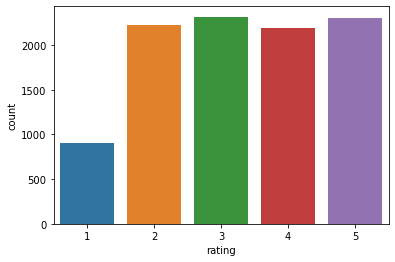

In [19]:
sns.countplot(x='rating', data=df_subset_03)

The plot above shows that the data is skewed to the right because the count of listings that received a rating of 1 is much lower that the rest. However, the count for all the other ratings appears to be more or less the same. This may indicate that making a prediction could be a challenge.

### Q1: Does the location of an Airbnb have an impact on the rating?

To answer this question, the number of listings in each borough by rating will be plotted.

<AxesSubplot:xlabel='rating', ylabel='count'>

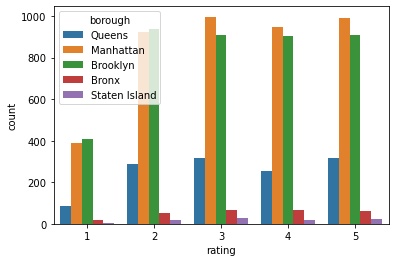

In [20]:
sns.countplot(x='rating', hue='borough', data=df_subset_03)

The plot above shows that the number of listings in the boroughs of Brooklyn and Manhattan based on rating are much higher than the rest. This does not tell us anything significant about how it impacts the rating because the patterns are very identical.

### Q2: Do the number of reviews having any impact on the rating?

To determine if the number of reviews that a listing receives has any impact on its ratings, we will calculate the number of listings that were reviewed by rating, followed by the percentage of reviews of listings based on the rating.

First, we will observe the distribution of reviews.

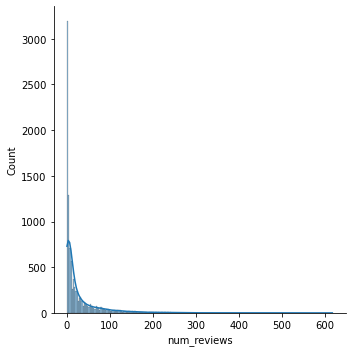

In [21]:
# Plot the overall distribution of reviews
sns.displot(x='num_reviews', data=df_subset_03, kde=True)

The plot shows that there is a extremely narrow distribution skewed to the left, close to where no reviews were written for a good majority of the listings. This can be based on the fact that many people do not feel comfortable with writing reviews.

Next, the number of listings that received reviews will be observed.

<AxesSubplot:xlabel='rating', ylabel='count'>

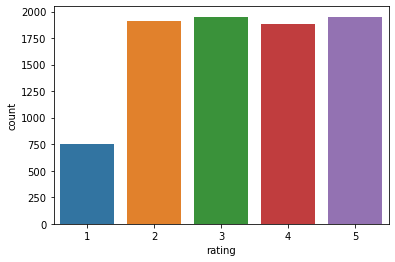

In [22]:
# Filter dataset for listings that received reviews.
df_filter_reviews = df_subset_03[(df_subset_03['num_reviews'] > 0)]

# Plot the dataset
sns.countplot(data=df_filter_reviews, x='rating')

The plot shows that all listings with a rating greater than 1 received just about the same number of reviews. This does not provide any indication that the number of reviews have an impact on the rating.

We could observe the percentage of listings that received reviews based on rating.

[Text(0.5, 1.0, 'Percentage of listings reviewed by rating')]

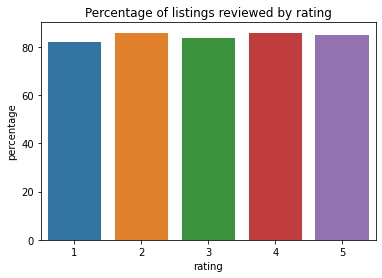

In [23]:
# List of ratings
ratings_list = df_subset_03['rating'].unique().tolist()
ratings_list.sort()

# Create list for the percentages
percent_reviewed = []

# For each rating, calculate the percentage of listings with that rating that received a review
for n in ratings_list:
    sum_listings_reviewed = len(df_subset_03[(df_subset_03['rating'] == n) & (df_subset_03['num_reviews'] > 0) ])
    length = len(df_subset_03[(df_subset_03['rating'] == n)])
    percentage_reviewed_by_rating = sum_listings_reviewed * 100 / length
    percent_reviewed.append(round(percentage_reviewed_by_rating))

ratings_reviewed_df = pd.DataFrame({'rating': ratings_list, 'percentage': percent_reviewed})
sns.barplot(data=ratings_reviewed_df, x='rating', y='percentage').set(title='Percentage of listings reviewed by rating')    

The plot shows that all the listings by rating received about the same percentage of reviews. This also tells us that more people were willing to leave a review than what was originally believed from the distribution plot.

### Q3: What impact does host verification, instant booking, and cancellation policy have on the rating?

Let's look at the categorical features and investigate their impact.

#### Host verification

<AxesSubplot:xlabel='rating', ylabel='count'>

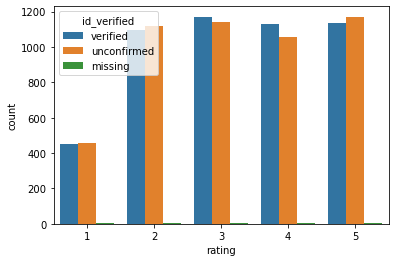

In [24]:
sns.countplot(data=df_subset_03, x='rating', hue='id_verified')

For host verification, there seems to be a little influence on the rating. For listings with a rating of 3 or 4, there is a slightly higher number of listings with confirmed verifications than those whose host verification status is unconfirmed. For listings with other ratings, it appears the number of unconfirmed verifications are higher. Even though it appears to be a slight difference, it is an interesting development.

#### Instant Booking Status

<AxesSubplot:xlabel='rating', ylabel='count'>

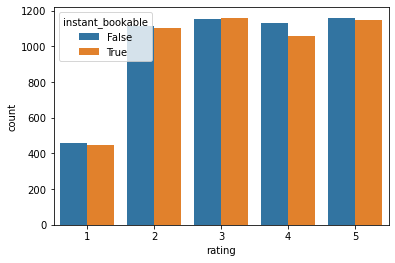

In [25]:
sns.countplot(data=df_subset_03, x='rating', hue='instant_bookable')

The booking status date shows that there is a greater number of listings that do not offer instant booking. The difference between listings that do not offer instant booking and those that do is most apparent with listings with a rating of 4. This could indicate that predicting the rating based on booking status would be easier for the model than it would be for the other features that were examined so far.

#### Cancellation Policy

<AxesSubplot:xlabel='cancellation_policy', ylabel='count'>

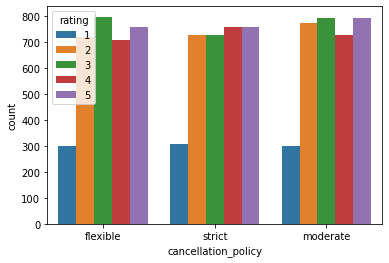

In [26]:
sns.countplot(data=df_subset_03, x='cancellation_policy', hue='rating')

Listings with a rating of 3 offer more flexible cancellations than the other listings, while listings with a rating of 4 or 5 offer more strict cancellations. This could also play a role in determining the rating.

## Part 2: Feature Engineering

### One Hot Encoding

The OHE process will transform categorical variables into numeric ones so that they can be used by the model. The old columns will then be replaced with the new columns in the dataset.

#### Id_verified

In [27]:
dummy = pd.get_dummies(df_subset_03['id_verified'])
dummy.head()

,missing,unconfirmed,verified
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [28]:
df_subset_03 = pd.concat([df_subset_03, dummy], axis=1).drop('id_verified', axis=1)
df_subset_03.rename(columns={'missing':'host_missing', 'unconfirmed':'host_unconfirmed','verified':'host_verified'}, inplace=True)
df_subset_03.head()

,num_host_listings,borough,instant_bookable,cancellation_policy,avail365,room_type,yr_built,price,service_fee,min_nights,num_reviews,monthly_reviews,rating,host_missing,host_unconfirmed,host_verified
0,1,Queens,False,flexible,0,Entire home/apt,2012,232,46,5,1,0.08,4,0,0,1
1,1,Queens,False,flexible,0,Entire home/apt,2022,996,199,1,1,0.09,5,0,0,1
2,1,Manhattan,True,flexible,0,Entire home/apt,2019,1127,225,3,5,0.31,3,0,1,0
3,1,Brooklyn,False,strict,0,Private room,2018,971,194,3,1,0.21,2,0,1,0
4,1,Brooklyn,True,moderate,0,Entire home/apt,2004,653,131,1,0,0.00,3,0,0,1


#### instant_bookable

In [29]:
dummy1 = pd.get_dummies(df_subset_03['instant_bookable'], drop_first=True)
dummy1.head()

,True
0,0
1,0
2,1
3,0
4,1


In [30]:
df_subset_03 = pd.concat([df_subset_03, dummy1], axis=1).drop('instant_bookable', axis=1)
df_subset_03.rename(columns={True:'instant_booking'}, inplace=True)
df_subset_03.head()

,num_host_listings,borough,cancellation_policy,avail365,room_type,yr_built,price,service_fee,min_nights,num_reviews,monthly_reviews,rating,host_missing,host_unconfirmed,host_verified,instant_booking
0,1,Queens,flexible,0,Entire home/apt,2012,232,46,5,1,0.08,4,0,0,1,0
1,1,Queens,flexible,0,Entire home/apt,2022,996,199,1,1,0.09,5,0,0,1,0
2,1,Manhattan,flexible,0,Entire home/apt,2019,1127,225,3,5,0.31,3,0,1,0,1
3,1,Brooklyn,strict,0,Private room,2018,971,194,3,1,0.21,2,0,1,0,0
4,1,Brooklyn,moderate,0,Entire home/apt,2004,653,131,1,0,0.00,3,0,0,1,1


#### Cancellation_policy

In [31]:
dummy2 = pd.get_dummies(df_subset_03['cancellation_policy'])
dummy2.head()

,flexible,moderate,strict
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0


In [32]:
df_subset_03 = pd.concat([df_subset_03, dummy2], axis=1).drop('cancellation_policy', axis=1)
df_subset_03.rename(columns={'moderate':'cancel_moderate', 'strict':'cancel_strict', 'flexible': 'cancel_flexible'}, inplace=True)
df_subset_03.head()

,num_host_listings,borough,avail365,room_type,yr_built,price,service_fee,min_nights,num_reviews,monthly_reviews,rating,host_missing,host_unconfirmed,host_verified,instant_booking,cancel_flexible,cancel_moderate,cancel_strict
0,1,Queens,0,Entire home/apt,2012,232,46,5,1,0.08,4,0,0,1,0,1,0,0
1,1,Queens,0,Entire home/apt,2022,996,199,1,1,0.09,5,0,0,1,0,1,0,0
2,1,Manhattan,0,Entire home/apt,2019,1127,225,3,5,0.31,3,0,1,0,1,1,0,0
3,1,Brooklyn,0,Private room,2018,971,194,3,1,0.21,2,0,1,0,0,0,0,1
4,1,Brooklyn,0,Entire home/apt,2004,653,131,1,0,0.00,3,0,0,1,1,0,1,0


#### borough

In [33]:
dummy3 = pd.get_dummies(df_subset_03['borough'])
dummy3

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
9995,0,1,0,0,0
9996,0,0,1,0,0
9997,0,0,1,0,0
9998,0,0,1,0,0


In [34]:
df_subset_03 = pd.concat([df_subset_03, dummy3], axis=1).drop('borough', axis=1)
df_subset_03.head()

,num_host_listings,avail365,room_type,yr_built,price,service_fee,min_nights,num_reviews,monthly_reviews,rating,...,host_verified,instant_booking,cancel_flexible,cancel_moderate,cancel_strict,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,1,0,Entire home/apt,2012,232,46,5,1,0.08,4,...,1,0,1,0,0,0,0,0,1,0
1,1,0,Entire home/apt,2022,996,199,1,1,0.09,5,...,1,0,1,0,0,0,0,0,1,0
2,1,0,Entire home/apt,2019,1127,225,3,5,0.31,3,...,0,1,1,0,0,0,0,1,0,0
3,1,0,Private room,2018,971,194,3,1,0.21,2,...,0,0,0,0,1,0,1,0,0,0
4,1,0,Entire home/apt,2004,653,131,1,0,0.00,3,...,1,1,0,1,0,0,1,0,0,0


#### room_type

In [35]:
dummy4 = pd.get_dummies(df_subset_03['room_type'])
dummy4

,Entire home/apt,Hotel room,Private room,Shared room
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
9995,0,0,0,1
9996,1,0,0,0
9997,1,0,0,0
9998,1,0,0,0


In [36]:
df_subset_03 = pd.concat([df_subset_03, dummy4], axis=1).drop('room_type', axis=1)
df_subset_03.head()

,num_host_listings,avail365,yr_built,price,service_fee,min_nights,num_reviews,monthly_reviews,rating,host_missing,...,cancel_strict,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Hotel room,Private room,Shared room
0,1,0,2012,232,46,5,1,0.08,4,0,...,0,0,0,0,1,0,1,0,0,0
1,1,0,2022,996,199,1,1,0.09,5,0,...,0,0,0,0,1,0,1,0,0,0
2,1,0,2019,1127,225,3,5,0.31,3,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,2018,971,194,3,1,0.21,2,0,...,1,0,1,0,0,0,0,0,1,0
4,1,0,2004,653,131,1,0,0.00,3,0,...,0,0,1,0,0,0,1,0,0,0


### Splitting the dataset

The dataset will be split between the input (feature) variables and the target variable (rating). Then, the dataset will be divided into training data and testing data. The training data will be applied to the model so that it can perform machine learning on the dataset, then it will apply what it learned to the testing data by making predictions on the dataset.

The features to be used in the model will be the ones that were examined during the EDA.

In [37]:
# Split the dataset into features and the target variable
feature_cols = ['Bronx', 'Brooklyn', 'Queens', 'Manhattan', 'Staten Island', 'host_verified', 'host_unconfirmed',
                'host_missing', 'instant_booking', 'cancel_moderate', 'cancel_strict', 'cancel_flexible', 'num_reviews']
X = df_subset_03[feature_cols] # Features
y = df_subset_03.rating # Target

# import the training and testing modules
from sklearn.model_selection import train_test_split

# 80% of the dataset will be used for training, leaving 20% for testing
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.20, random_state=16)

### Standardization

In [38]:
# import the standard scaler
from sklearn.preprocessing import StandardScaler

# Scale the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

### Import and train the Gaussian NB model

The first model that will be used to make predictions is the Gaussian NB model. NB stands for Naive Bayes, which is one of the more popular models used for performing classifications.

In [39]:
# Import the Gaussian NB model
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
gnb = GaussianNB()

# Perform the predictions
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Display results
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
3381,2,2
4642,4,2
230,5,2
8034,1,2
3879,4,2
...,...,...
9065,4,2
9425,2,2
3753,1,4
697,2,2


In [40]:
from sklearn import metrics

# Print number of mislabled points
print("Number of mislabeled points out of a total %d points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
# Print accuracy score
gnb_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: " + str(gnb_accuracy))

Number of mislabeled points out of a total 1988 points: 1538
Accuracy: 0.22635814889336017


<b>Mislabeled points: </b> 1538 out of 1988 points
<br>
<b>Accuracy: </b> 0.22635814889336017

The number of mislabeled data points and the accuracy score indicate that the model did not perform well on the testing data. This is probably due to the lack of impact the features examined in the EDA had on the rating.

To confirm this, we could look at the prior probabilities for each ratings.

#### Prior probabilities for each rating

In [41]:
# Get the class labels from the model
class_labels = gnb.classes_
# Get the probabilities for each class
class_prob = gnb.class_prior_

# Create a Dataframe for the class probabilities
class_prob_df = pd.DataFrame({'class': class_labels, 'probability': class_prob})
class_prob_df

,class,probability
0,1,0.087662
1,2,0.224249
2,3,0.230663
3,4,0.222488
4,5,0.234939


The dataframe above shows that the similar probabilities for all listings based on rating (with the exception of those with a rating of 1) would have an effect on the model's ability to make a correct prediction. This was a hypothesis that was stated earlier in the EDA when counting the number of listings based on rating.

### Evaluating Gaussian NB Model

#### Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

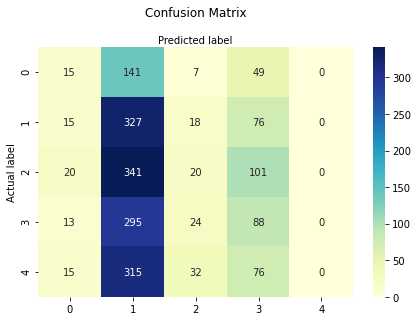

In [42]:
# import the metrics class
from sklearn import metrics

# passing actual and predicted values
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = gnb.classes_ # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The confusion matrix shows that there were a high number of predictions for listings having a rating of 2 (the model represented this as class label '1'). This means that the model showed some bias towards this label for some reason. Also, the model did not predict any listing to have a rating of 5 (or class label '4').

#### Classification report

In [43]:
from sklearn.metrics import classification_report
target_names = ['1', '2', '3', '4', '5']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.19      0.07      0.10       212
           2       0.23      0.75      0.35       436
           3       0.20      0.04      0.07       482
           4       0.23      0.21      0.22       420
           5       0.00      0.00      0.00       438

    accuracy                           0.23      1988
   macro avg       0.17      0.21      0.15      1988
weighted avg       0.17      0.23      0.15      1988



C:\Users\19145\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19145\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19145\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As stated before, the Gaussian NB model had an accuracy of 23%. In regards to each rating, it had the highest accuracy for listings with a rating of 2. This was evident in the confusion matrix.

Precision: Measures the percentage of listings that actually received the rating that they were predicted to have. There is a tie among listings with ratings of 2 and 4.

Recall: Measures the percentage of listings whose rating the model was able to identify. It had the highest recall for listings with a rating of 2 (75%).

### Improve Gaussian NB Model

To improve the model, the amount of testing data will be increased to 30% (70% of the data will be used for training).

In [44]:
# 70% of the dataset will be used for training, leaving 30% for testing
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.30, random_state=16)

# Scale the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# Instantiate the model
gnb_01 = GaussianNB()

# Perform the predictions
y_pred = gnb_01.fit(X_train, y_train).predict(X_test)

# Display results
result_01 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result_01

,Actual,Predicted
3381,2,2
4642,4,4
230,5,3
8034,1,2
3879,4,3
...,...,...
7204,3,4
133,3,2
3658,4,2
5007,5,2


In [45]:
# Print number of mislabled points
print("Number of mislabeled points out of a total %d points: %d" % (X_test.shape[0], (y_test != y_pred).sum()))
# Print accuracy score
gnb_01_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: " + str(gnb_01_accuracy))

Number of mislabeled points out of a total 2982 points: 2327
Accuracy: 0.21965124077800133


<b>Mislabeled points: </b> 2327 out of 2982 points
<br>
<b>Accuracy: </b> 0.21965124077800133

Judging from the Accuracy score, the model performed slightly worse with the increase in testing data. This means that more testing data did not improve the model.

#### Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

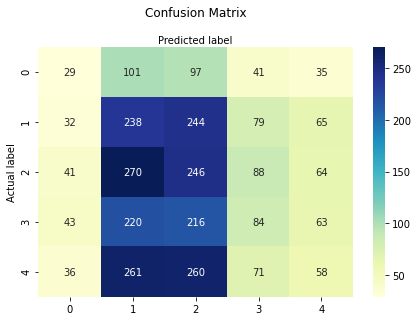

In [46]:
# passing actual and predicted values
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = gnb_01.classes_ # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The confusion matrix now shows that the majority of predictions were for listings with ratings of 2-3. Also, the model was able to predict listings with a rating of 5, as it was not able to do so in its previous run.

#### Classification Report

In [47]:
from sklearn.metrics import classification_report
target_names = ['1', '2', '3', '4', '5']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.16      0.10      0.12       303
           2       0.22      0.36      0.27       658
           3       0.23      0.35      0.28       709
           4       0.23      0.13      0.17       626
           5       0.20      0.08      0.12       686

    accuracy                           0.22      2982
   macro avg       0.21      0.20      0.19      2982
weighted avg       0.21      0.22      0.20      2982



The precision of the model improve to 21%. This can be contributed to being able to identify listings with the highest rating. It also shows a more balanced amount of precision among listings based on rating.

For recall, it was highest for listings with ratings of 2-3.

### Import and train the Decision Tree model

The second model that will be used to classify the dataset is the Decision Tree. This model uses a tree-like structure to make predictions on data. This includes branching out until it has enough data to make a decision in regards to a data point.

In [48]:
# Import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#### Splitting the dataset

In [49]:
# Perform another splitting of the dataset, including more features
feature_cols_dt = ['Bronx', 'Brooklyn', 'Queens', 'Manhattan', 'Staten Island', 'host_verified', 'host_unconfirmed',
                'host_missing', 'instant_booking', 'cancel_moderate', 'cancel_strict', 'cancel_flexible', 'avail365',
                   'price', 'service_fee', 'min_nights', 'num_reviews', 'monthly_reviews']
X1 = df_subset_03[feature_cols_dt] # Features
y1 = df_subset_03.rating # Target

#### Training and Testing data

In [50]:
# assign test data size to 20%
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 42)

#### Build the Decision Tree model

In [51]:
# Create the Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Train the Decision Tree Classifier
dtc = dtc.fit(X1_train, y1_train)

# Make the predictions
y1_pred = dtc.predict(X1_test)

### Evaluate the Decision Tree

#### Accuracy

In [52]:
# Print the accuracy of the classifier
print("Accuracy: ", metrics.accuracy_score(y1_test, y1_pred))

Accuracy:  0.2454728370221328


The Accuracy returned a score of approximately 26%, which is better than the Naive Bayes model, but is still poor.

#### Visualize the Decision Tree

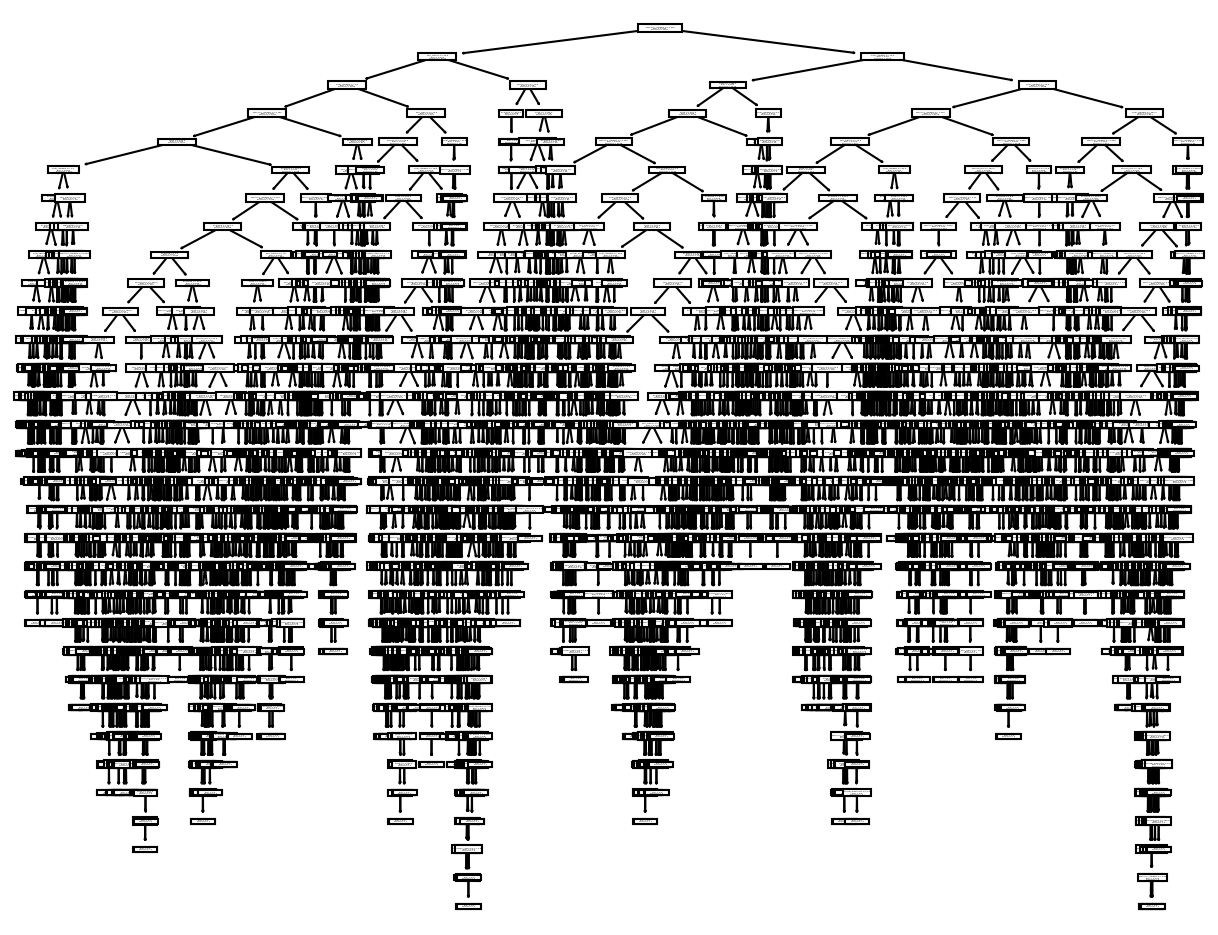

In [53]:
# Import module for visualizing the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dtc, feature_names=feature_cols_dt);

The Decision Tree produced by the model is a messy one. It is difficult to determine anything from this visualization, especially information regarding how decisions are made when trying to reach a prediction. Therefore, the classifier will have to be modified in an attempt to improve acccuracy.

#### Retrain the Model

In [54]:
# Create the Decision Tree Classifier
# The splitting strategy and max levels of branching will be modified
dtc = DecisionTreeClassifier(max_depth=3)

# Train the Decision Tree Classifier
dtc = dtc.fit(X1_train, y1_train)

# Make the predictions
y1_pred = dtc.predict(X1_test)

#### Print the Accuracy of the re-trained model

In [55]:
# Print the accuracy of the classifier
print("Accuracy: ", metrics.accuracy_score(y1_test, y1_pred))

Accuracy:  0.22334004024144868


The reduced Accuracy score of approximately 22% shows that reducing the levels did not improve the model's performance.

#### Another visualization of the Decision Tree

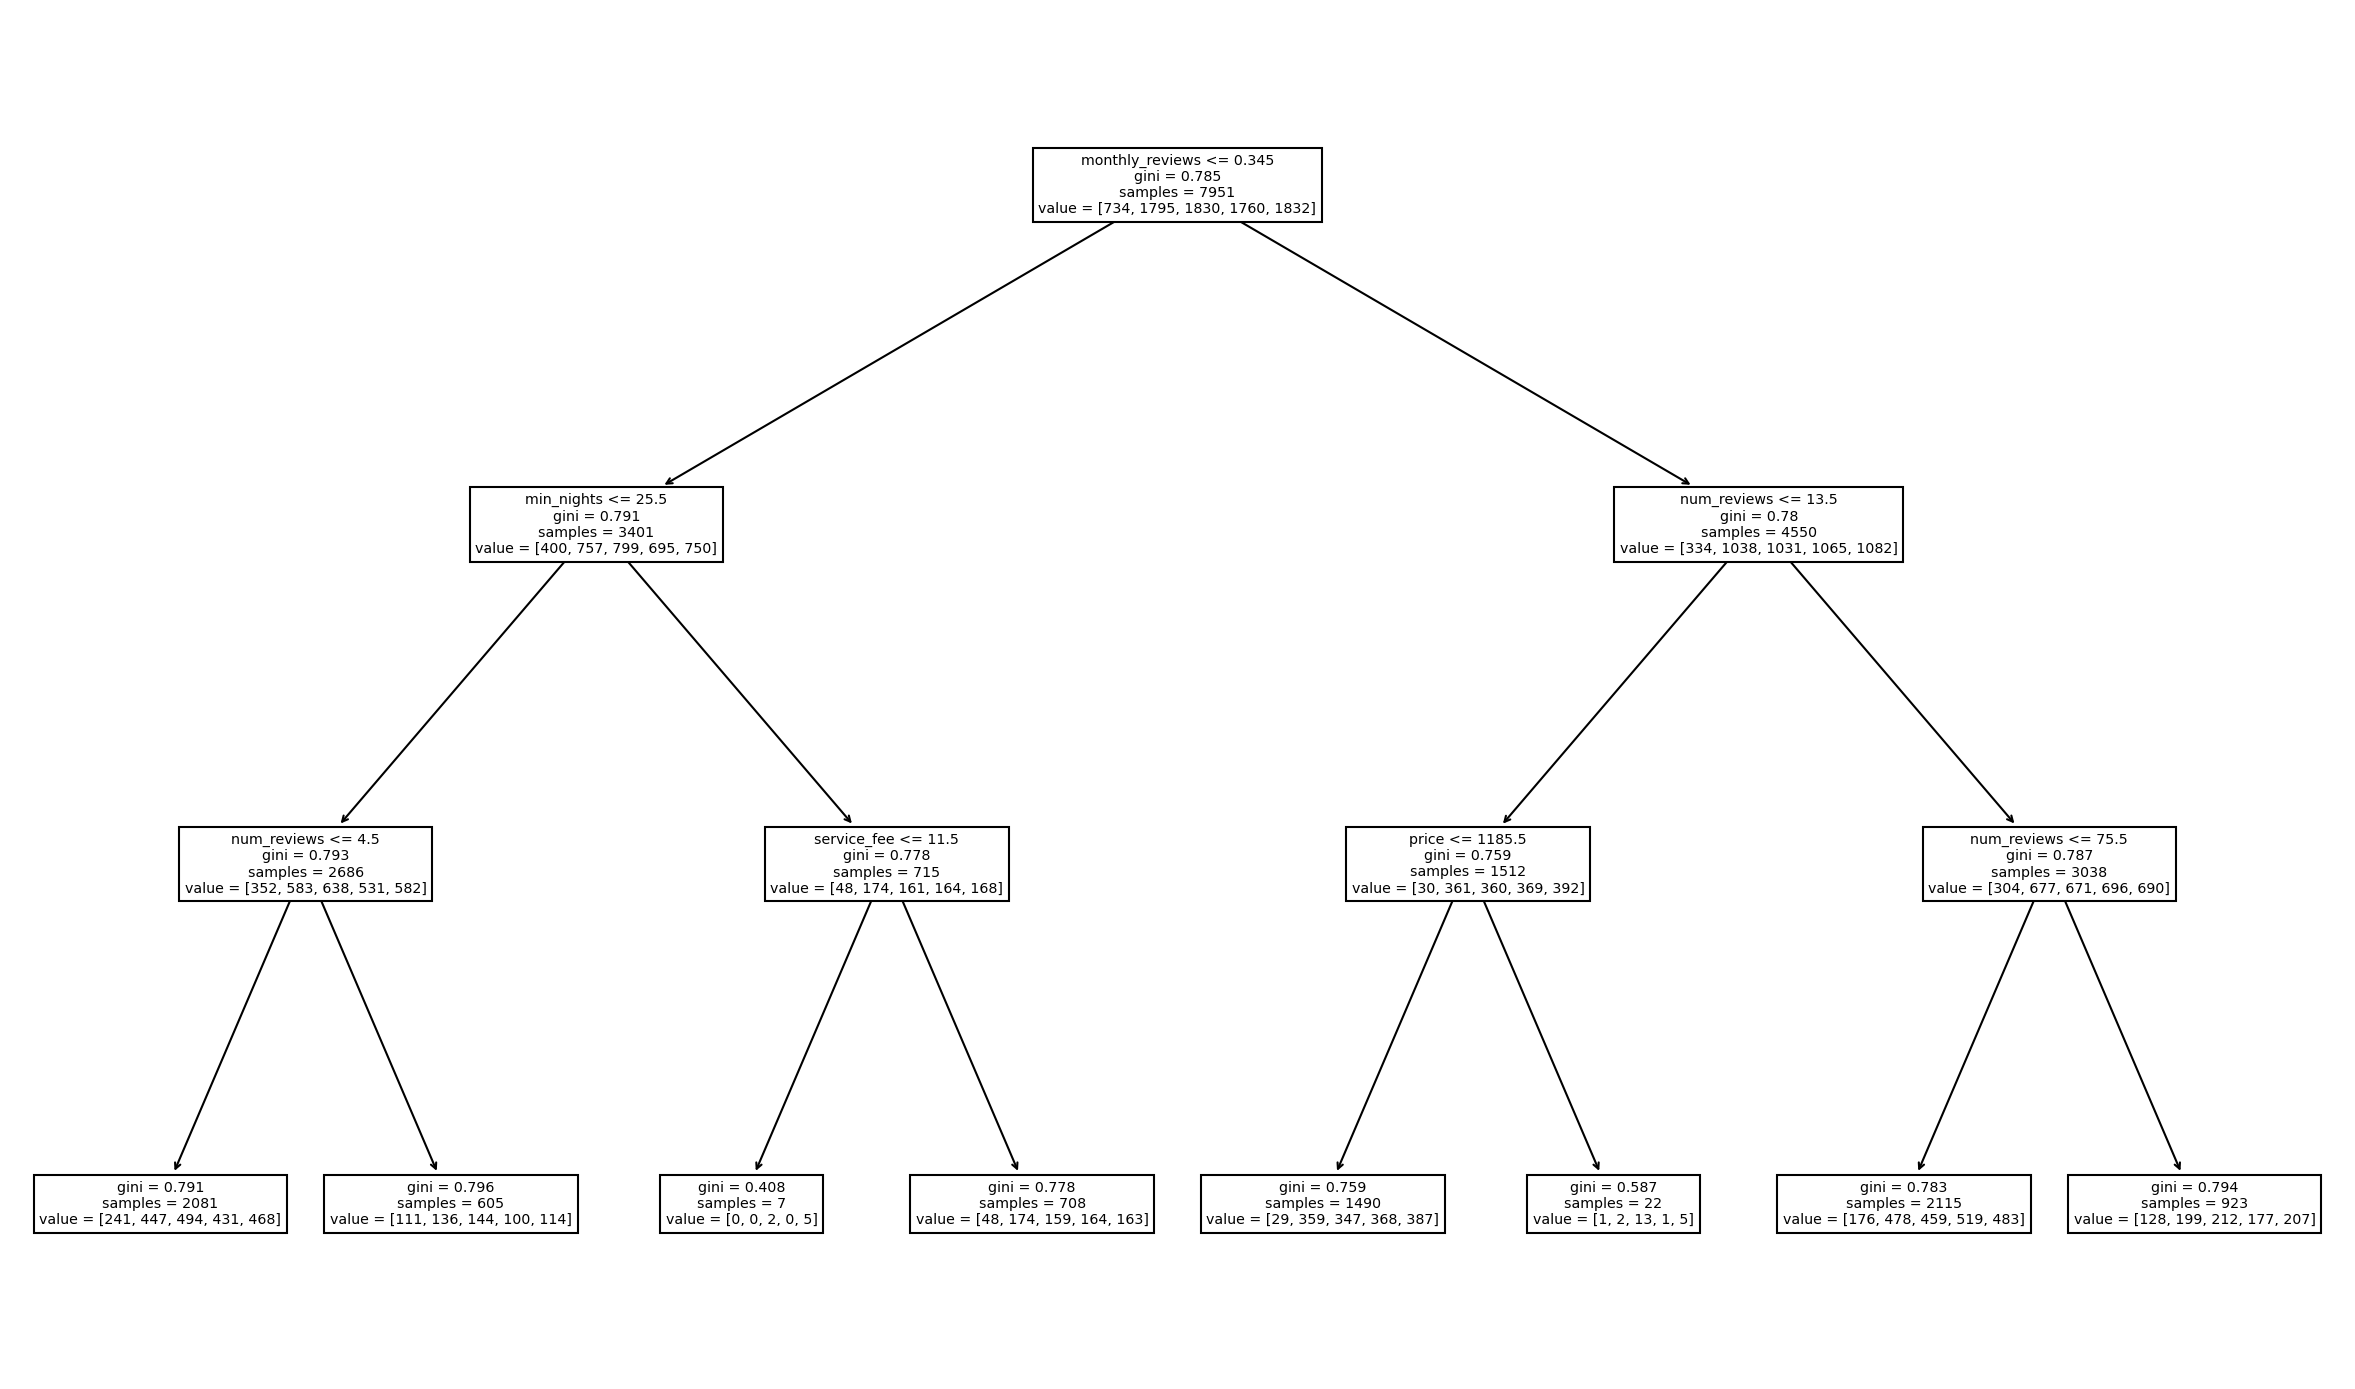

In [56]:
# Import module for visualizing the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,12), dpi=150)
plot_tree(dtc, feature_names=feature_cols_dt);

This shortened version of the Decision Tree allows the viewing of insights into how the tree is constructed. The root node is a test of the monthly reviews attribute. According to the model, the monthly reviews attribute received the highest importance in predicting a rating. Based on its value (being less than or equal to 0.345), it would make a decision on what attribute (or feature) to examine less. For example, depending on the value, either the minimum nights attribute would be examined next, or the number of reviews attribute would be examined.

When it comes to guests making a decision about an Airbnb listing, this model suggests that observing the average number of reviews a listing receives a month would be their first metric towards making a decision. This makes sense since the number of reviews per month represent the frequency of occupancy at a listing.

#### Examine Coefficients

In [57]:
feature_names = X1.columns
importance = dtc.feature_importances_

coefficients_df = pd.DataFrame({'feature': feature_names,
                              'importance': importance})
coefficients_df

,feature,importance
0,Bronx,0.000000
1,Brooklyn,0.000000
2,Queens,0.000000
3,Manhattan,0.000000
4,Staten Island,0.000000
5,host_verified,0.000000
6,host_unconfirmed,0.000000
7,host_missing,0.000000
8,instant_booking,0.000000
9,cancel_moderate,0.000000


From the list of coefficients, it is clearly indicated that the model did not include any of the categorical variables, choosing to focus on the numeric variables instead to make its predictions. This would suggest that a guest would be more swayed by quantitative metrics as opposed to qualitative ones.

#### Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

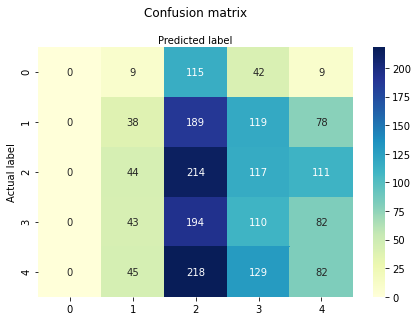

In [58]:
# passing actual and predicted values
cnf_matrix = metrics.confusion_matrix(y1_test, y1_pred)

class_names = dtc.classes_
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

According to the Confusion Matrix, the Decision Tree predicted the value '3' for the majority of its ratings (this is given the class label of '2'). It also showed a failure to predict '1' for any listings' rating (this is given the class label of '0'). This bias contributed to the poor accuracy of the model, as was the case with the Gaussian NB model.

#### Classification Report

In [59]:
target_names = ['1', '2', '3', '4', '5']
print(classification_report(y1_test, y1_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       175
           2       0.21      0.09      0.13       424
           3       0.23      0.44      0.30       486
           4       0.21      0.26      0.23       429
           5       0.23      0.17      0.20       474

    accuracy                           0.22      1988
   macro avg       0.18      0.19      0.17      1988
weighted avg       0.20      0.22      0.20      1988



C:\Users\19145\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19145\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19145\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b>Precision: </b> Outside of listings with a rating of '1', the Decision Tree shared equal precision rates of 23% for listings with a ratings of '3' and '5' and 21% for listings with a rating of '2' and '4'.

<b>Recall: </b> The Decision Tree model was able to identify listings with a rating of '3' more than any other listing at a rate of 44%.

## Conclusion

The best explanation for why each model performed so poorly when trying to predict the rating for an Airbnb listing was that the count of listings by rating was pretty much the same. This was reflected when performing EDA on a few of the dataset's features. It was difficult to determine any feature that would have a profound impact on what rating the listing received. Even though the Decision Tree was able to indicate how the numeric features had a clear significant impact on the rating, it still resulted in a low accuracy score for its predictions.